<a href="https://colab.research.google.com/github/eko31rj/proyek_analisis_data_dicoding_eko31rj/blob/main/Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Eko Rachmat Julianto
- **Email:** eko31rj@gmail.com
- **ID Dicoding:** eko31rj

## Menentukan Pertanyaan Bisnis

- Produk apa yang paling banyak terjual?
- Pada pukul berapa pelanggan paling banyak bertransaksi?

## Import Semua Packages/Library yang Digunakan

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [70]:
# Read dataset
customer_df = pd.read_csv('https://raw.githubusercontent.com/eko31rj/proyek_analisis_data_dicoding_eko31rj/refs/heads/main/data/customers_dataset.csv')
geolocation_df = pd.read_csv('https://raw.githubusercontent.com/eko31rj/proyek_analisis_data_dicoding_eko31rj/refs/heads/main/data/geolocation_dataset.csv')
order_items_df = pd.read_csv('https://raw.githubusercontent.com/eko31rj/proyek_analisis_data_dicoding_eko31rj/refs/heads/main/data/order_items_dataset.csv')
order_payments_df = pd.read_csv('https://raw.githubusercontent.com/eko31rj/proyek_analisis_data_dicoding_eko31rj/refs/heads/main/data/order_payments_dataset.csv')
order_reviews_df = pd.read_csv('https://raw.githubusercontent.com/eko31rj/proyek_analisis_data_dicoding_eko31rj/refs/heads/main/data/order_reviews_dataset.csv')
orders_df = pd.read_csv('https://raw.githubusercontent.com/eko31rj/proyek_analisis_data_dicoding_eko31rj/refs/heads/main/data/orders_dataset.csv')
product_category_df = pd.read_csv('https://raw.githubusercontent.com/eko31rj/proyek_analisis_data_dicoding_eko31rj/refs/heads/main/data/product_category_name_translation.csv')
products_df = pd.read_csv('https://raw.githubusercontent.com/eko31rj/proyek_analisis_data_dicoding_eko31rj/refs/heads/main/data/products_dataset.csv')
sellers_df = pd.read_csv('https://raw.githubusercontent.com/eko31rj/proyek_analisis_data_dicoding_eko31rj/refs/heads/main/data/sellers_dataset.csv')

# Membuat variabel untuk seluruh data set
data = {'customer_df': customer_df,
        'geolocation_df': geolocation_df,
        'order_items_df': order_items_df,
        'order_payments_df': order_payments_df,
        'order_reviews_df': order_reviews_df,
        'orders_df': orders_df,
        'product_category_df': product_category_df,
        'products_df': products_df,
        'sellers_df': sellers_df}

Preview

In [71]:
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [72]:
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [73]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [74]:
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [75]:
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [76]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [77]:
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [78]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [79]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- **customer_df** berisi tentang informasi tentang customer id dan daerah lokasi customer tinggal.
- **geolocation_df** berisi tentang zip code, geolokasi dan daerah lokasi terdaftar.
- **order_items_df** berisi tentang informasi dari order, produk, seller dan pengiriman dari produk yang ditransaksikan/dikirim.
- **order_payments_df** berisi tentang detail pembayaran dari setiap order.
- **order_reviews_df** berisi tentang informasi review dari setiap order.
- **orders_df** berisi tentang customer, status order, dan timestamp dari setiap order.
- **product_category_df** berisi tentang terjemahan kategori produk ke dalam bahasa Inggris.
- **products_df** berisi tentang detail informasi produk terdaftar.
- **sellers_df** berisi tentang informasi lokasi terdaftar dari setiap seller.

Untuk menjawab pertanyaan yang telah ditentukan, diperlukan dataset **items_product_category_order_df**, yang merupakan gabungan dari **orders_df**, **order_items_df**, **products_df** dan **product_category_df**


### Assessing Data

In [80]:
# Daftar dataset
dataset = {"order_items": order_items_df,
           "orders": orders_df,
           "products": products_df,
           "product_category": product_category_df}

# Setting Loop untuk mencetak info setiap dataset
for name, df in dataset.items():
    print(f"dataset: {name}")
    print(df.info())

    # Menampilkan jumlah missing value di setiap kolom
    print("\nJumlah missing value per Kolom:")
    print(df.isna().sum())
    print("\nTotal Jumlah missing value:")
    print(df.isna().sum().sum())

    # Menampilkan jumlah duplikat
    duplicate_count = df.duplicated().sum()
    print(f"Jumlah Duplikat: {duplicate_count}")

    # Menampilkan deskripsi statistik
    print("\nDeskripsi Statistik:")
    print(df.describe(include='all'))

    print(("-" * 80) + "\n")  # Pembatas antar DataFrame

dataset: order_items
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None

Jumlah missing value per Kolom:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Total Jumlah missing value:
0
Jumlah Duplikat: 0

Deskripsi Statistik:
                                order_id  order_it

**Insight:**

- order_items_df memiliki 112650 baris data, dengan tipe data normal, kecuali untuk kolom shipping_limit_date yang seharusnya bertipe datetime. Lalu, order_items_df memiliki jumlah missing value 0, dan jumlah duplikat 0.
- orders_df memiliki 99441 baris data, dengan tipe data yang kurang tepat pada kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date, yang seharusnya bertipe datetime. Selain itu, orders_df memiliki jumlah missing value 160 pada kolom order_approved_at, 1783 pada kolom order_delivered_carrier_date, 2965 pada kolom order_delivered_customer_date, dan jumlah duplikat 0.
- products_df memiliki 32951 baris data, dengan tipe data yang tepat, jumlah missing value 2448 dari seluruh kolom, dan jumlah duplikat 0.
- products_category_df memiliki 71 baris data, dengan tipe data yang tepat, jumlah missing value 0, dan jumlah duplikat 0.

### Cleaning Data

**Cleaning Data pada order_items_df**

In [81]:
# Mengganti Tipe Data pada order_items_df
datetime_columns1 = ["shipping_limit_date"]

for column in datetime_columns1:
  order_items_df[column] = pd.to_datetime(order_items_df[column])

order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


**Cleaning Data pada orders_df**

In [82]:
# Mengganti Tipe Data pada orders_df
datetime_columns2 = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns2:
  orders_df[column] = pd.to_datetime(orders_df[column])

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [83]:
# menampilkan missing value
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


In [84]:
# menampilkan missing value
orders_df[orders_df.order_delivered_carrier_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaT,NaT,2016-12-09
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


In [85]:
# menampilkan missing value
orders_df[orders_df.order_delivered_customer_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


**Insight :**

*   Penyebab missing value pada kolom order_approved_at ialah karena pesanan dibatalkan.
*   Penyebab missing value pada kolom order_delivered_carrier_date ialah karena pesanan dibatalkan, produk tidak tersedia, atau pesanan masih diproses.
*   Penyebab missing value pada kolom order_delivered_customer_date ialah karena pesanan dibatalkan, produk tidak tersedia, pesanan masih diproses, atau masih dalam pengiriman

In [86]:
# Mengisi missing value pada orders_df
## Mengisi missing value di `order_approved_at`
approved_deltas = (orders_df['order_approved_at'] - orders_df['order_purchase_timestamp']).dt.total_seconds() / 60
most_frequent_or_mean_approved = approved_deltas.mode()[0] if not approved_deltas.mode().empty else approved_deltas.mean()
orders_df['order_approved_at'] = orders_df['order_approved_at'].fillna(
    orders_df['order_purchase_timestamp'] + pd.to_timedelta(most_frequent_or_mean_approved, unit='m')
)

## Mengisi missing value di `order_delivered_carrier_date`
carrier_deltas = (orders_df['order_delivered_carrier_date'] - orders_df['order_approved_at']).dt.total_seconds() / 60
most_frequent_or_mean_carrier = carrier_deltas.mode()[0] if not carrier_deltas.mode().empty else carrier_deltas.mean()
orders_df['order_delivered_carrier_date'] = orders_df['order_delivered_carrier_date'].fillna(
    orders_df['order_approved_at'] + pd.to_timedelta(most_frequent_or_mean_carrier, unit='m')
)

## Mengisi missing value di `order_delivered_customer_date`
customer_deltas = (orders_df['order_delivered_customer_date'] - orders_df['order_delivered_carrier_date']).dt.total_seconds() / 60
most_frequent_or_mean_customer = customer_deltas.mode()[0] if not customer_deltas.mode().empty else customer_deltas.mean()
orders_df['order_delivered_customer_date'] = orders_df['order_delivered_customer_date'].fillna(
    orders_df['order_delivered_carrier_date'] + pd.to_timedelta(most_frequent_or_mean_customer, unit='m')
)


In [87]:
# Review jumlah missing value pada orders_df
print(f"jumlah missing value pada orders_df")
orders_df.isna().sum()

jumlah missing value pada orders_df


,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0


**Cleaning Data pada products_df**

In [88]:
# menampilkan missing value
products_df[products_df.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [89]:
# menampilkan missing value
products_df[products_df.product_weight_g.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
# Menangani missing value dengan cara mengisinya dengan 'unknown' jika tipe series object dan 0 jika tipe series int atau float
products_df = products_df.apply(lambda col: col.fillna('unknown') if col.dtypes == 'object' else col.fillna(0))

# Review jumlah missing value pada products_df
print(f"Jumlah missing value pada products_df:")
products_df.isna().sum()

Jumlah missing value pada products_df:


,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


**Insight:**
- Dataset order_items_df sudah siap digunakan setelah dilakukan cleaning perubahan tipe data.
- Dataset orders_df sudah siap digunakan setelah dilakukan cleaning perubahan tipe data dan pengisian missing value.
- Dataset products_df sudah siap digunakan setelah dilakukan cleaning engisian missing value.

## Exploratory Data Analysis (EDA)

### Explore ...

In [91]:
# Merge dataset dari orders_df, order_items_df, products_df dan product_category_df
merged_data1 = pd.merge(order_items_df, orders_df, on="order_id")
merged_data2 = pd.merge(merged_data1, products_df, on="product_id")
merged_data = pd.merge(merged_data2, product_category_df, on="product_category_name")

merged_data.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,order_estimated_delivery_date,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,2017-09-29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,2017-05-15,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,2018-02-05,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,2018-08-20,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,2017-03-17,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools


In [92]:
# Top 10 produk terlaris

product_sales = merged_data.groupby('product_category_name_english')['order_id'].count().sort_values(ascending=False)
product_sales.head(10)

,order_id
product_category_name_english,
bed_bath_table,11115
health_beauty,9670
sports_leisure,8641
furniture_decor,8334
computers_accessories,7827
housewares,6964
watches_gifts,5991
telephony,4545
garden_tools,4347


In [93]:
# Top 10 waktu favorit belanja customer dengan jumlahnya

merged_data['order_hour'] = merged_data['order_purchase_timestamp'].dt.hour
hourly_orders = merged_data.groupby('order_hour')['order_id'].count().sort_values(ascending=False).reset_index()
hourly_orders.head(10)


,order_hour,order_id
0,16,7537
1,14,7451
2,11,7326
3,13,7297
4,15,7276
5,10,6930
6,17,6902
7,21,6810
8,20,6803
9,12,6713


**Insight:**
- Produk terlaris adalah bed_bath_table dengan jumlah order sebanyak 11115.
- Waktu favorit belanja customer adalah siang hingga awal sore hari (pukul 11.00 s.d. 16.00).

## Visualization & Explanatory Analysis

### Pertanyaan 1:

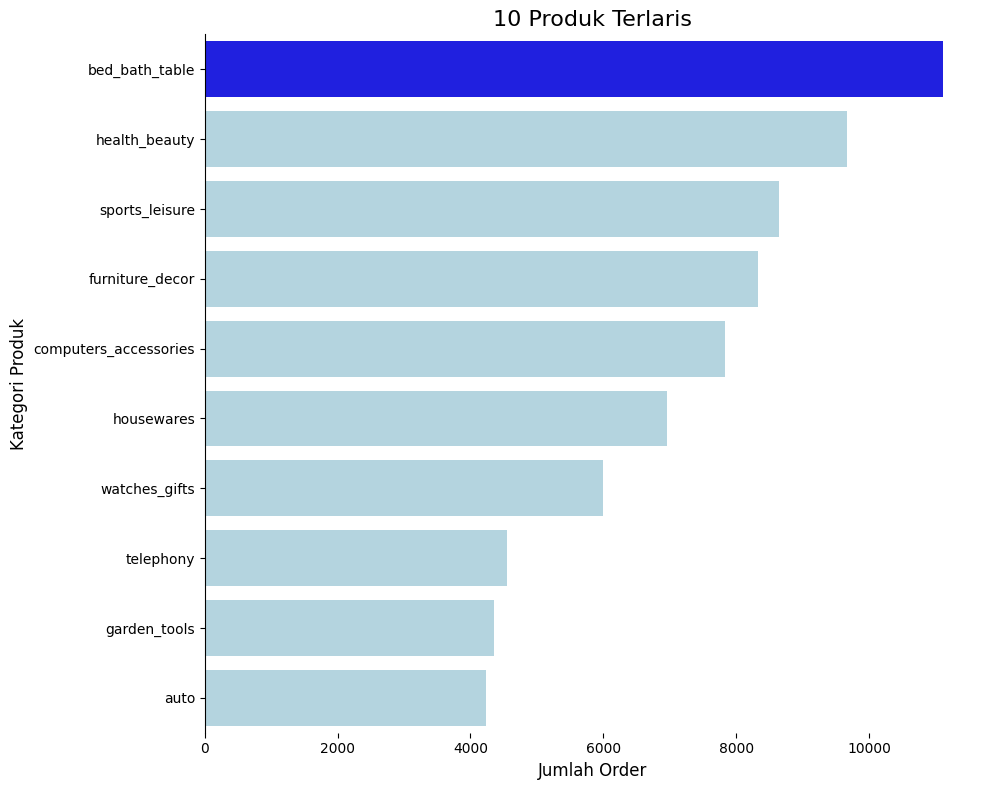

In [94]:
# Mengurutkan product_sales berdasarkan order_id secara menurun
top10_product_sales = product_sales.sort_values(ascending=False).head(10)
top10_product_sales = top10_product_sales.reset_index()

top_product = top10_product_sales['product_category_name_english'].iloc[0] # Menentukan top product


plt.figure(figsize=(10, 8)) # Set ukuran figure

# Pengaturan warna
colors = ['lightblue' if product != top_product else 'blue' for product in top10_product_sales['product_category_name_english']]

# Membuat horizontal bar chart menggunakan seaborn
sns.barplot(x='order_id',
            y='product_category_name_english',
            hue='product_category_name_english',
            data=top10_product_sales,
            orient='h', # orientasi horizontal
            palette=colors,
            legend=False) # Set warna

plt.title('10 Produk Terlaris', fontsize=16) # judul
plt.xlabel('Jumlah Order', fontsize=12) # label sumbu x
plt.ylabel('Kategori Produk', fontsize=12) # label sumbu y
sns.despine(left=False, bottom=True)

plt.tight_layout() # Set layout agar tidak terpotong
plt.show() # show chart

### Pertanyaan 2:

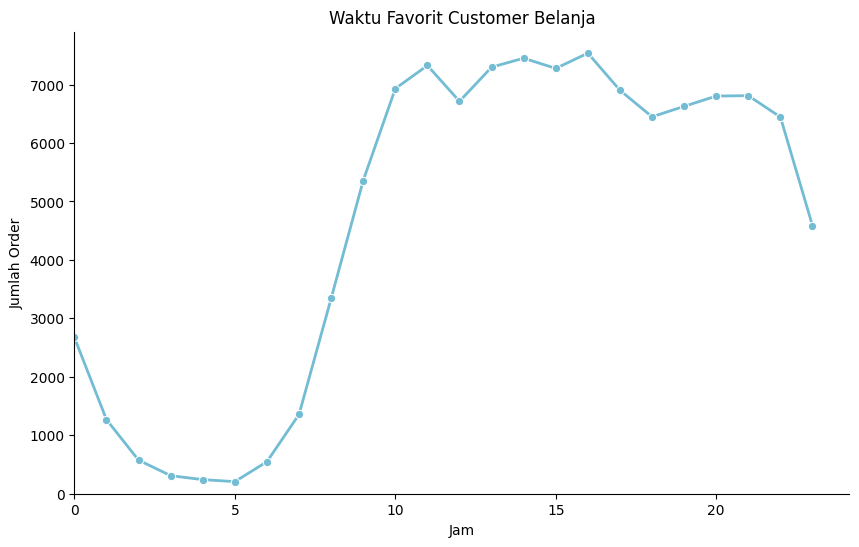

In [95]:
# Membuat line chart waktu terbanyak customer belanja

plt.figure(figsize=(10, 6))
sns.lineplot(
    x='order_hour',
    y='order_id',
    data=hourly_orders,
    marker='o',
    linewidth=2,
    color="#72BCD4")
plt.title('Waktu Favorit Customer Belanja')
plt.xlabel('Jam')
plt.ylabel('Jumlah Order')
sns.despine(left=False, bottom=False)
plt.ylim(0)
plt.xlim(0)
plt.show()


**Insight:**
- Produk terlaris adalah bed_bath_table dengan jumlah order, diikuti oleh health beauty dan sport leisure
- Waktu favorit belanja customer adalah siang hingga awal sore hari (pukul 11.00 s.d. 16.00).

## Analisis Lanjutan (Opsional)

## Conclusion

- Kategori produk yang terlaris adalah bed_bath_table, dengan lebih dari 11.000 penjualan, diikuti oleh health_beauty dan sport_leisure. Kategori-kategori ini mewakili barang-barang rumah tangga, perawatan pribadi, dan rekreasi, yang mencerminkan permintaan pelanggan yang tinggi terhadap kategori tersebut. Kontributor signifikan lainnya termasuk furniture_decor, computers_accesories, dan peralatan housewares.
- Waktu favorit belanja para customer adalah pada waktu siang hingga awal sore hari sebelum waktu pulang kerja (pukul 11.00 - 16.00). Hal ini dipengaruhi oleh waktu luang, kondisi fisik dan mental, ketersediaan layanan, kebiasaan, dan kemudahan akses e-commerce itu sendiri.